# 1. <a id='toc1_'></a>[Predicting customer churn in the chain of "As a guest" hotels](#toc0_)

`Project description` - the purpose of this project: to identify potential hotel guests who are likely to cancel a hotel room reservation. This study will help to improve business expense planning and minimize financial costs for the hotel.

**Table of contents**<a id='toc0_'></a>    
- 1. [Predicting customer churn in the chain of "As a guest" hotels](#toc1_)    
    - 1.1.1. [Step 1: Open the data files](#toc1_1_1_)    
    - 1.1.2. [Step 2: Pre-processing and exploratory data analysis](#toc1_1_2_)    
      - 1.1.2.1. [Data preprocessing](#toc1_1_2_1_)    
    - 1.1.3. [Exploratory data analysis](#toc1_1_3_)    
    - 1.1.4. [Step 3: Formulating an ML problem based on a business problem](#toc1_1_4_)    
    - 1.1.5. [Step 4: Developing the ML model](#toc1_1_5_)    
      - 1.1.5.1. [Applying the best model to the test sample](#toc1_1_5_1_)    
    - 1.1.6. [Step 5: Describe the profile of the "unreliable" client](#toc1_1_6_)    
    - 1.1.7. [Step 6. Write a general conclusion](#toc1_1_7_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### 1.1.1. <a id='toc1_1_1_'></a>[Step 1: Open the data files](#toc0_)

Import the necessary modules and libraries according to `PEP-8`

In [1]:
# standart libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# third-party libraries
from sklearn import datasets
from sklearn import svm
from scipy.stats import uniform
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import r2_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle

Block with constants

In [2]:
# budget allocated for the development of the model
BUDGET = 400000

Loading the data

In [3]:
try:
    df_train = pd.read_csv('hotel_train.csv')
    df_test = pd.read_csv('hotel_test.csv')
except:
    df_train = pd.read_csv('/datasets/hotel_train.csv')
    df_test = pd.read_csv('/datasets/hotel_test.csv')

Conducting a preliminary review of the data

Output the basic information for each table.
To optimize the code, we create a function `show_i()` that takes a dataframe as an argument and displays the necessary information.

In [4]:
def show_i(data):

    '''Display the following information on the screen:

    - table size
    - basic information
    - first 5 lines of the table
    - summary statistics by numeric parameters
    - total statistics by non-numeric parameters'''

    display(data.shape)
    display(data.info())
    display(data.head())
    display(data.describe())
    display(data.describe(include=['O']))
   

Applying the function to familiarize with the data

In [5]:
show_i(df_train)

(65229, 25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

None

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.0,2015,July,27,1,0,1,1.0,...,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.0,2015,July,27,1,0,2,2.0,...,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.0,2015,July,27,1,0,3,2.0,...,0,0,0,A,0,0,Transient,0,1,3


,id,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
count,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000
mean,43544.069172,0.368609,96.337917,2015.719021,31.339772,15.847813,0.825185,2.224793,1.836576,0.074890,0.007236,0.027151,0.128915,0.107713,0.194269,3.334422,0.056647,0.512763,3.049978
std,25614.858971,0.482431,96.127545,0.449481,13.464024,8.748182,0.853477,1.354992,0.480245,0.334243,0.098790,0.162523,0.965326,1.326638,0.593838,18.239606,0.232094,0.752590,1.738108
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19108.000000,0.000000,17.000000,2015.000000,21.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,40554.000000,0.000000,64.000000,2016.000000,34.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,67414.000000,1.000000,151.000000,2016.000000,42.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
max,84121.000000,1.000000,374.000000,2016.000000,53.000000,31.000000,4.000000,6.000000,4.000000,3.000000,10.000000,1.000000,26.000000,58.000000,17.000000,259.000000,3.000000,5.000000,10.000000


,arrival_date_month,meal,country,distribution_channel,reserved_room_type,customer_type
count,65229,65229,65229,65229,65229,65229
unique,12,5,155,4,7,4
top,October,BB,PRT,TA/TO,A,Transient
freq,9255,51697,28831,54454,50501,45493


In [6]:
show_i(df_test)

(32412, 25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                          32412 non-null  float64
 12  meal                            

None

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.0,2017,January,1,1,1,0,2.0,...,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.0,2017,January,1,1,2,2,1.0,...,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.0,2017,January,1,1,2,5,2.0,...,0,0,0,A,0,0,Transient,0,0,7


,id,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
count,32412.000000,32412.000000,32412.000000,32412.0,32412.000000,32412.000000,32412.000000,32412.00000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000
mean,60131.505183,0.388467,97.587869,2017.0,17.804054,15.656948,0.867888,2.34009,1.858602,0.083765,0.005523,0.031377,0.011601,0.171418,0.216741,0.262341,0.046248,0.657781,3.207979
std,29953.586177,0.487409,86.507146,0.0,9.177384,8.766429,0.853394,1.37517,0.489341,0.343470,0.075757,0.174338,0.180473,1.875170,0.640551,4.733027,0.219367,0.834341,1.738683
min,6086.000000,0.000000,0.000000,2017.0,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,45291.750000,0.000000,23.000000,2017.0,10.000000,8.000000,0.000000,1.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,53394.500000,0.000000,76.000000,2017.0,18.000000,15.500000,1.000000,2.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,89800.250000,1.000000,155.000000,2017.0,25.000000,23.000000,2.000000,3.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
max,97903.000000,1.000000,373.000000,2017.0,35.000000,31.000000,4.000000,6.00000,4.000000,3.000000,2.000000,1.000000,6.000000,72.000000,18.000000,223.000000,8.000000,5.000000,10.000000


,arrival_date_month,meal,country,distribution_channel,reserved_room_type,customer_type
count,32412,32412,32412,32412,32412,32412
unique,8,5,143,4,7,4
top,May,BB,PRT,TA/TO,A,Transient
freq,5262,24684,9887,27083,23471,27461


`Conclusion:` - The training dataset is twice as big as the test one, it will have a positive effect on learning, a lot of material.

A preliminary review revealed no missing values, but there are signs that we may need to change type.
For example: 'lead_time', 'adults', 'children', and 'babies'. These values can be converted from real to integer (float -> int).

### 1.1.2. <a id='toc1_1_2_'></a>[Step 2: Pre-processing and exploratory data analysis](#toc0_)

#### 1.1.2.1. <a id='toc1_1_2_1_'></a>[Data preprocessing](#toc0_)

Checking data types

In [7]:
# train sampling
print(df_train.dtypes)

# displaying all columns for a better overview
pd.set_option('display.max_columns', None)
df_train.head()

id                                  int64
is_canceled                         int64
lead_time                         float64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                            float64
children                          float64
babies                            float64
meal                               object
country                            object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
booking_changes                     int64
days_in_waiting_list                int64
customer_type                      object
required_car_parking_spaces         int64
total_of_special_requests         

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.0,2015,July,27,1,0,1,1.0,0.0,0.0,BB,GBR,Direct,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.0,2015,July,27,1,0,2,2.0,0.0,0.0,BB,GBR,TA/TO,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.0,2015,July,27,1,0,2,2.0,0.0,0.0,BB,PRT,Direct,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.0,2015,July,27,1,0,2,2.0,0.0,0.0,FB,PRT,Direct,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.0,2015,July,27,1,0,3,2.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,3


In [8]:
# test sampling
print(df_test.dtypes)
df_test.head()

id                                  int64
is_canceled                         int64
lead_time                         float64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                            float64
children                          float64
babies                            float64
meal                               object
country                            object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
booking_changes                     int64
days_in_waiting_list                int64
customer_type                      object
required_car_parking_spaces         int64
total_of_special_requests         

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.0,2017,January,1,1,1,0,2.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.0,2017,January,1,1,2,2,2.0,0.0,0.0,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.0,2017,January,1,1,2,2,2.0,0.0,0.0,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.0,2017,January,1,1,2,2,1.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.0,2017,January,1,1,2,5,2.0,0.0,0.0,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,0,7


Both dataframes contain attributes describing integer values, such as the number of children, but their type is specified as float.
Let's convert the real attributes to integer ones.

In [9]:
# changing type float -> into int in df_train
df_train['lead_time'] = df_train['lead_time'].astype(int)
df_train['adults'] = df_train['adults'].astype(int)
df_train['children'] = df_train['children'].astype(int)
df_train['babies'] = df_train['babies'].astype(int)

# changing type float -> into int in df_test
df_test['lead_time'] = df_test['lead_time'].astype(int)
df_test['adults'] = df_test['adults'].astype(int)
df_test['children'] = df_test['children'].astype(int)
df_test['babies'] = df_test['babies'].astype(int)

Ckecking the type change to Int

In [10]:
print(df_train.dtypes)

id                                 int64
is_canceled                        int64
lead_time                          int32
arrival_date_year                  int64
arrival_date_month                object
arrival_date_week_number           int64
arrival_date_day_of_month          int64
stays_in_weekend_nights            int64
stays_in_week_nights               int64
adults                             int32
children                           int32
babies                             int32
meal                              object
country                           object
distribution_channel              object
is_repeated_guest                  int64
previous_cancellations             int64
previous_bookings_not_canceled     int64
reserved_room_type                object
booking_changes                    int64
days_in_waiting_list               int64
customer_type                     object
required_car_parking_spaces        int64
total_of_special_requests          int64
total_nights    

In [11]:
print(df_test.dtypes)

id                                 int64
is_canceled                        int64
lead_time                          int32
arrival_date_year                  int64
arrival_date_month                object
arrival_date_week_number           int64
arrival_date_day_of_month          int64
stays_in_weekend_nights            int64
stays_in_week_nights               int64
adults                             int32
children                           int32
babies                             int32
meal                              object
country                           object
distribution_channel              object
is_repeated_guest                  int64
previous_cancellations             int64
previous_bookings_not_canceled     int64
reserved_room_type                object
booking_changes                    int64
days_in_waiting_list               int64
customer_type                     object
required_car_parking_spaces        int64
total_of_special_requests          int64
total_nights    

`Output:` - the data types have been successfully changed.

Check the missing values in the tables in the percentage

In [12]:
# df_train missing values
display('df_train missing data:', pd.DataFrame(round(df_train.isna().mean()*100)).style.background_gradient('coolwarm'))

# df_test missing values
display('df_test missing data:', pd.DataFrame(round(df_test.isna().mean()*100)).style.background_gradient('coolwarm'))

'df_train missing data:'

,0
id,0.000000
is_canceled,0.000000
lead_time,0.000000
arrival_date_year,0.000000
arrival_date_month,0.000000
arrival_date_week_number,0.000000
arrival_date_day_of_month,0.000000
stays_in_weekend_nights,0.000000
stays_in_week_nights,0.000000
adults,0.000000


'df_test missing data:'

,0
id,0.000000
is_canceled,0.000000
lead_time,0.000000
arrival_date_year,0.000000
arrival_date_month,0.000000
arrival_date_week_number,0.000000
arrival_date_day_of_month,0.000000
stays_in_weekend_nights,0.000000
stays_in_week_nights,0.000000
adults,0.000000


`Conclusion:` - there are no missing values.

Checking for obvious duplicates

In [13]:
# We check obvious duplicates - strings that are exactly the same as those already found in the dataset. There are no obvious duplicates.

# df_train duplicates
print('df_train дубликаты:', df_train.duplicated().sum())

# df_test duplicates
print('df_test дубликаты:', df_test.duplicated().sum())

df_train дубликаты: 0
df_test дубликаты: 0


`Conclusion:` - no duplicates

Let's remove the columns that we do not need for training. Column `id` has no information load, the parameter `arrival_date_week_number` is also not informative, moreover, it partially duplicates other time parameters available to us, for example `arrival_date_day_of_month`. The `country` parameter essentially affects the `lead_time` parameter as the distance of the country can affect the length of time between booking and arrival at the hotel.

In [14]:
df_train = df_train.drop(columns=['id', 'arrival_date_week_number', 'country'], axis=1)
df_test = df_test.drop(columns=['id', 'arrival_date_week_number', 'country'], axis=1)

In [15]:
df_train

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,7,2015,July,1,0,1,1,0,0,BB,Direct,0,0,0,A,0,0,Transient,0,0,1
1,0,14,2015,July,1,0,2,2,0,0,BB,TA/TO,0,0,0,A,0,0,Transient,0,1,2
2,0,0,2015,July,1,0,2,2,0,0,BB,Direct,0,0,0,C,0,0,Transient,0,0,2
3,0,9,2015,July,1,0,2,2,0,0,FB,Direct,0,0,0,C,0,0,Transient,0,1,2
4,1,85,2015,July,1,0,3,2,0,0,BB,TA/TO,0,0,0,A,0,0,Transient,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65224,0,23,2016,December,30,2,4,2,0,0,BB,TA/TO,0,0,0,D,0,0,Transient,0,2,6
65225,0,53,2016,December,31,2,3,2,0,0,HB,TA/TO,0,0,0,D,0,0,Transient,0,3,5
65226,0,7,2016,December,31,2,4,2,0,0,BB,TA/TO,0,0,0,D,0,0,Transient,0,1,6
65227,0,17,2016,December,30,2,5,2,0,0,SC,TA/TO,0,0,0,A,0,0,Transient,0,1,7


Checking removal

In [16]:
print(df_train.columns)
print(df_test.columns)

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'booking_changes', 'days_in_waiting_list', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests',
       'total_nights'],
      dtype='object')
Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'booking_changes', 'days_in_waiting_list', 'customer_type',
       'required_car_parking_spaces', 'total_of

`Output after preprocessing` - As a result of preprocessing, the data types that need to change type were identified, the type change was done. No missing values were found and no duplicates were found. Parameters not affecting the analysis were removed. The data is ready for analysis. The target attibute is `is_canceled`.

### 1.1.3. <a id='toc1_1_3_'></a>[Exploratory data analysis](#toc0_)

Let's filter the attributes with non-binary values in order to output a table with correlation.

In [17]:
features1=list(['is_canceled', 'lead_time','arrival_date_month','arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
 'adults', 'children', 'babies', 'meal', 'distribution_channel','reserved_room_type', 'booking_changes', 'days_in_waiting_list', 'customer_type',
 'required_car_parking_spaces', 'total_of_special_requests', 'total_nights'])


features2=list(['is_canceled', 'lead_time','arrival_date_month','arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
 'adults', 'children', 'babies', 'meal', 'distribution_channel','reserved_room_type', 'booking_changes', 'days_in_waiting_list', 'customer_type',
  'required_car_parking_spaces', 'total_of_special_requests', 'total_nights'])


Output the table

In [18]:
df_train[features1].corr()
df_train[features2].corr()

,is_canceled,lead_time,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
is_canceled,1.000000,0.328142,-0.001903,-0.013767,0.010650,0.045153,-0.017746,-0.029589,-0.142935,0.075848,-0.186486,-0.257061,0.001542
lead_time,0.328142,1.000000,-0.010252,0.047003,0.172646,0.119617,-0.056359,-0.024649,-0.007191,0.209741,-0.116867,-0.147738,0.157671
arrival_date_day_of_month,-0.001903,-0.010252,1.000000,-0.002017,0.003705,0.006034,0.018558,-0.000482,0.022560,0.017070,0.003816,0.005875,0.001898
stays_in_weekend_nights,-0.013767,0.047003,-0.002017,1.000000,0.197410,0.116679,0.026224,0.018822,0.023118,-0.065167,-0.015870,0.083682,0.644935
stays_in_week_nights,0.010650,0.172646,0.003705,0.197410,1.000000,0.119901,0.023590,0.018428,0.061721,0.036037,-0.026988,0.090359,0.876515
adults,0.045153,0.119617,0.006034,0.116679,0.119901,1.000000,-0.003216,0.019756,-0.056396,-0.013475,0.013321,0.171793,0.150766
children,-0.017746,-0.056359,0.018558,0.026224,0.023590,-0.003216,1.000000,0.018410,0.053835,-0.038615,0.047881,0.112699,0.031268
babies,-0.029589,-0.024649,-0.000482,0.018822,0.018428,0.019756,0.018410,1.000000,0.076910,-0.013391,0.030264,0.098973,0.023608
booking_changes,-0.142935,-0.007191,0.022560,0.023118,0.061721,-0.056396,0.053835,0.076910,1.000000,-0.011225,0.059084,0.043884,0.059468
days_in_waiting_list,0.075848,0.209741,0.017070,-0.065167,0.036037,-0.013475,-0.038615,-0.013391,-0.011225,1.000000,-0.044083,-0.106080,-0.003906


Save the selected attributes to a variable to create a graph.

In [19]:
df_train_graph = df_train[features1]

Create a graph with filtered data (without binary values except the target) df_train_graph

<AxesSubplot: >

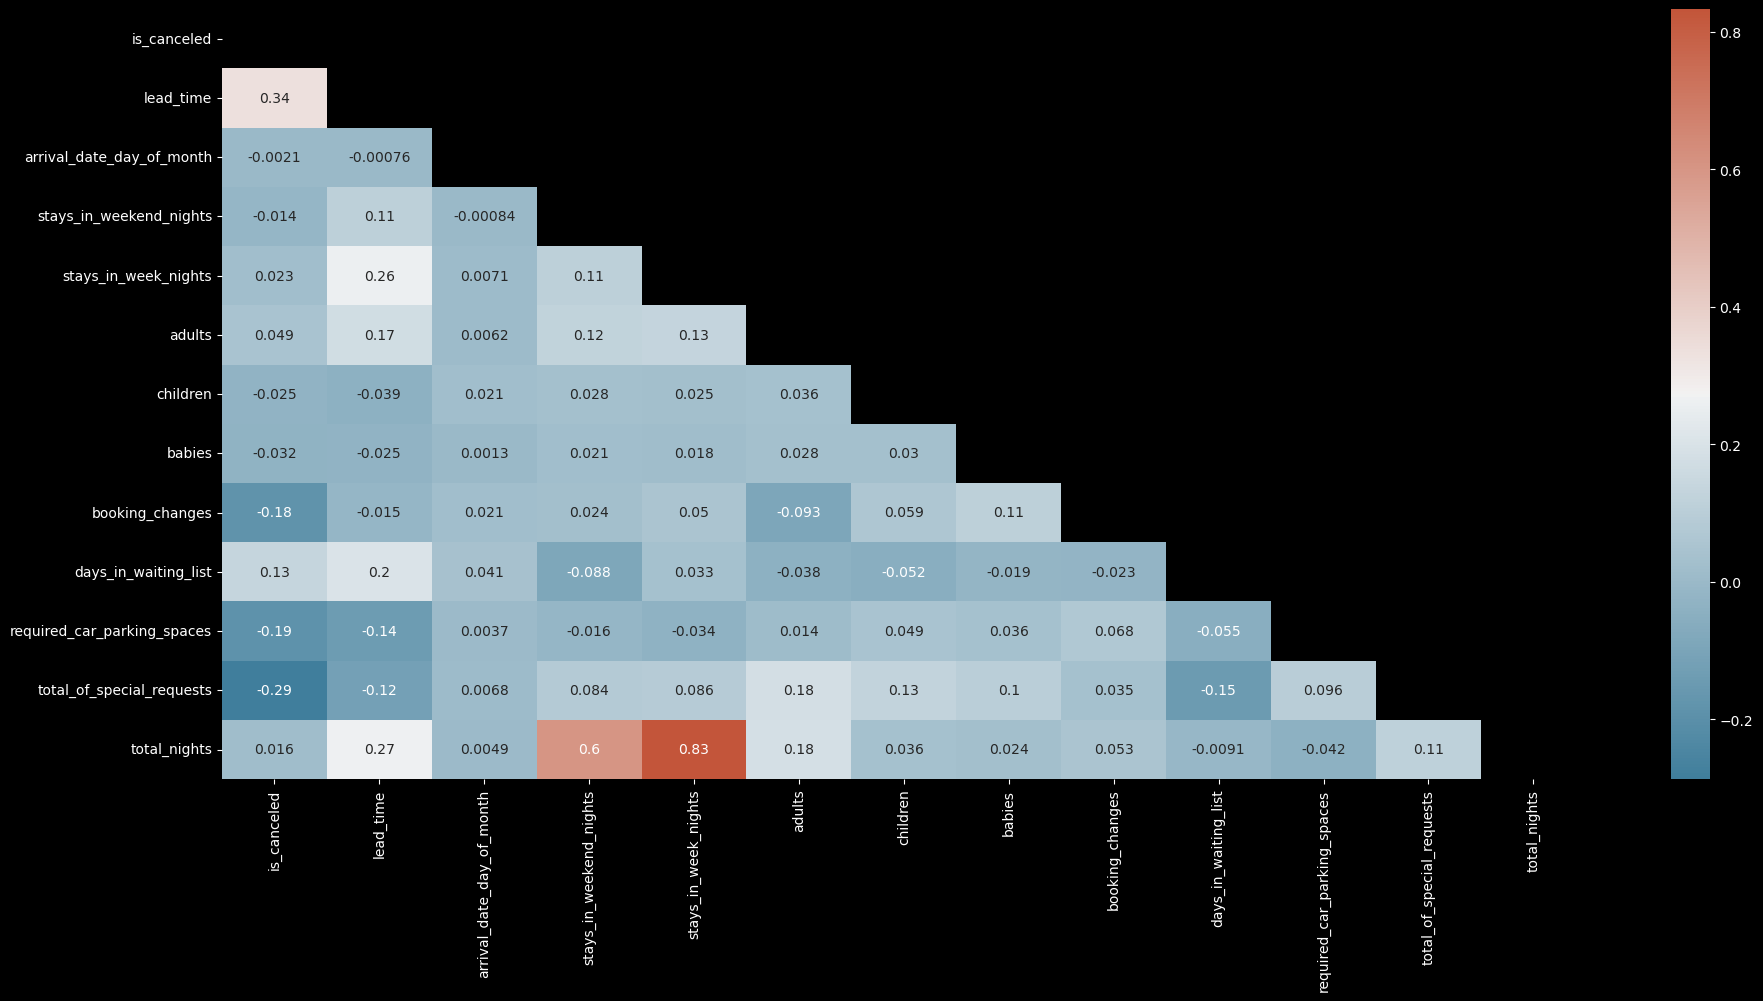

In [20]:
# correlation by df_train_graph

# correlation between different values
corr = df_train_graph.corr(method='spearman')

# setting matplotlib plot configuration
f, ax = plt.subplots(figsize=(22, 10))

# set the plot scheme
mask = np.triu(np.ones_like(corr, dtype=bool))

# set color
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# print the chart
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

Run the EDA on the training data. Let's see if there is a correlation between the values in the table and the target value 'is_calceled'

`Conclusion:` - we see that the target attribute `is_canceled` does not have any significant correlation with other parameters.

Let's display the values of the 'reserved_room_type' parameter for future creation of new parameters: 'night_cost' and 'one_time_cleaning' for your reference

In [21]:
df_train_unique = df_train.loc[:, 'reserved_room_type']
df_train_unique.unique()

array(['A               ', 'C               ', 'D               ',
       'E               ', 'G               ', 'F               ',
       'B               '], dtype=object)

We see that the types of numbers are written with spaces. Let's take it into account when creating new parameters.

We create two functions: `night` where we calculate the cost of overnight stay in the room depending on the category of the room. And `cleaning` where we record the cost of the cost of cleaning the room.

In [22]:
# creating function night

def night(row):
    row = row['reserved_room_type']
    if row == 'A               ':
        return 1000
    if row == 'B               ':
        return 800
    if row == 'C               ':
        return 600
    if row == 'D               ':
        return 550
    if row == 'E               ':
        return 500
    if row == 'F               ':
        return 450
    if row == 'G               ':
        return 350

In [23]:
# creating function cleaning

def cleaning(row):
    row = row['reserved_room_type']
   
    if row == 'A               ':
        return 400
    if row == 'B               ':
        return 350
    if row == 'C               ':
        return 350
    if row == 'D               ':
        return 150
    if row == 'E               ':
        return 150
    if row == 'F               ':
        return 150
    if row == 'G               ':
        return 150


Apply functions to create new columns with the room cost per night and room cleaning cost.

In [24]:
# adding new parameters to train
df_train['winter_night_cost'] = df_train.apply(night, axis=1)
df_train['one_time_cleaning_winter'] = df_train.apply(cleaning, axis=1)

# adding new parameters to test
df_test['winter_night_cost'] = df_train.apply(night, axis=1)
df_test['one_time_cleaning_winter'] = df_train.apply(cleaning, axis=1)

Check the creation of new parameters and output the table.

In [25]:
# display df_train
display(df_train.head())

# display df_test
display(df_test.head())

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,winter_night_cost,one_time_cleaning_winter
0,0,7,2015,July,1,0,1,1,0,0,BB,Direct,0,0,0,A,0,0,Transient,0,0,1,1000,400
1,0,14,2015,July,1,0,2,2,0,0,BB,TA/TO,0,0,0,A,0,0,Transient,0,1,2,1000,400
2,0,0,2015,July,1,0,2,2,0,0,BB,Direct,0,0,0,C,0,0,Transient,0,0,2,600,350
3,0,9,2015,July,1,0,2,2,0,0,FB,Direct,0,0,0,C,0,0,Transient,0,1,2,600,350
4,1,85,2015,July,1,0,3,2,0,0,BB,TA/TO,0,0,0,A,0,0,Transient,0,1,3,1000,400


,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,winter_night_cost,one_time_cleaning_winter
0,1,74,2017,January,1,1,0,2,0,0,BB,TA/TO,0,0,0,A,0,0,Transient,0,0,1,1000,400
1,1,62,2017,January,1,2,2,2,0,0,BB,TA/TO,0,0,0,A,0,0,Transient,0,1,4,1000,400
2,1,62,2017,January,1,2,2,2,0,0,BB,TA/TO,0,0,0,A,0,0,Transient,0,1,4,600,350
3,1,71,2017,January,1,2,2,1,0,0,BB,TA/TO,0,0,0,A,0,0,Transient,0,1,4,600,350
4,1,172,2017,January,1,2,5,2,0,0,BB,TA/TO,0,0,0,A,0,0,Transient,0,0,7,1000,400


Take into account the seasonal coefficient and create coefficients for further profit calculation

In [26]:
def season_coeff(row):
    row = row['arrival_date_month']
    '''For each season we enter a weight factor 
    by which the room and cleaning costs will be multiplied'''
   
    if row == 'December' or row == 'January' or row == 'February':
        return 1
    if row == 'June' or row == 'July' or row == 'August':
        return 1.4
    else:
        return 1.2


Create new parameters with the function

In [27]:
df_train['season_coeff'] = df_train.apply(season_coeff, axis=1)
df_test['season_coeff'] = df_test.apply(season_coeff, axis=1)

Display the dataframes to make sure the new attributes are added

In [28]:
display(df_train.loc[:, ['arrival_date_month', 'season_coeff']])
display(df_test.loc[:, ['arrival_date_month', 'season_coeff']])

,arrival_date_month,season_coeff
0,July,1.4
1,July,1.4
2,July,1.4
3,July,1.4
4,July,1.4
...,...,...
65224,December,1.0
65225,December,1.0
65226,December,1.0
65227,December,1.0


,arrival_date_month,season_coeff
0,January,1.0
1,January,1.0
2,January,1.0
3,January,1.0
4,January,1.0
...,...,...
32407,August,1.4
32408,August,1.4
32409,August,1.4
32410,August,1.4


Output the overall histogram for all df_train parameters

<function matplotlib.pyplot.show(close=None, block=None)>

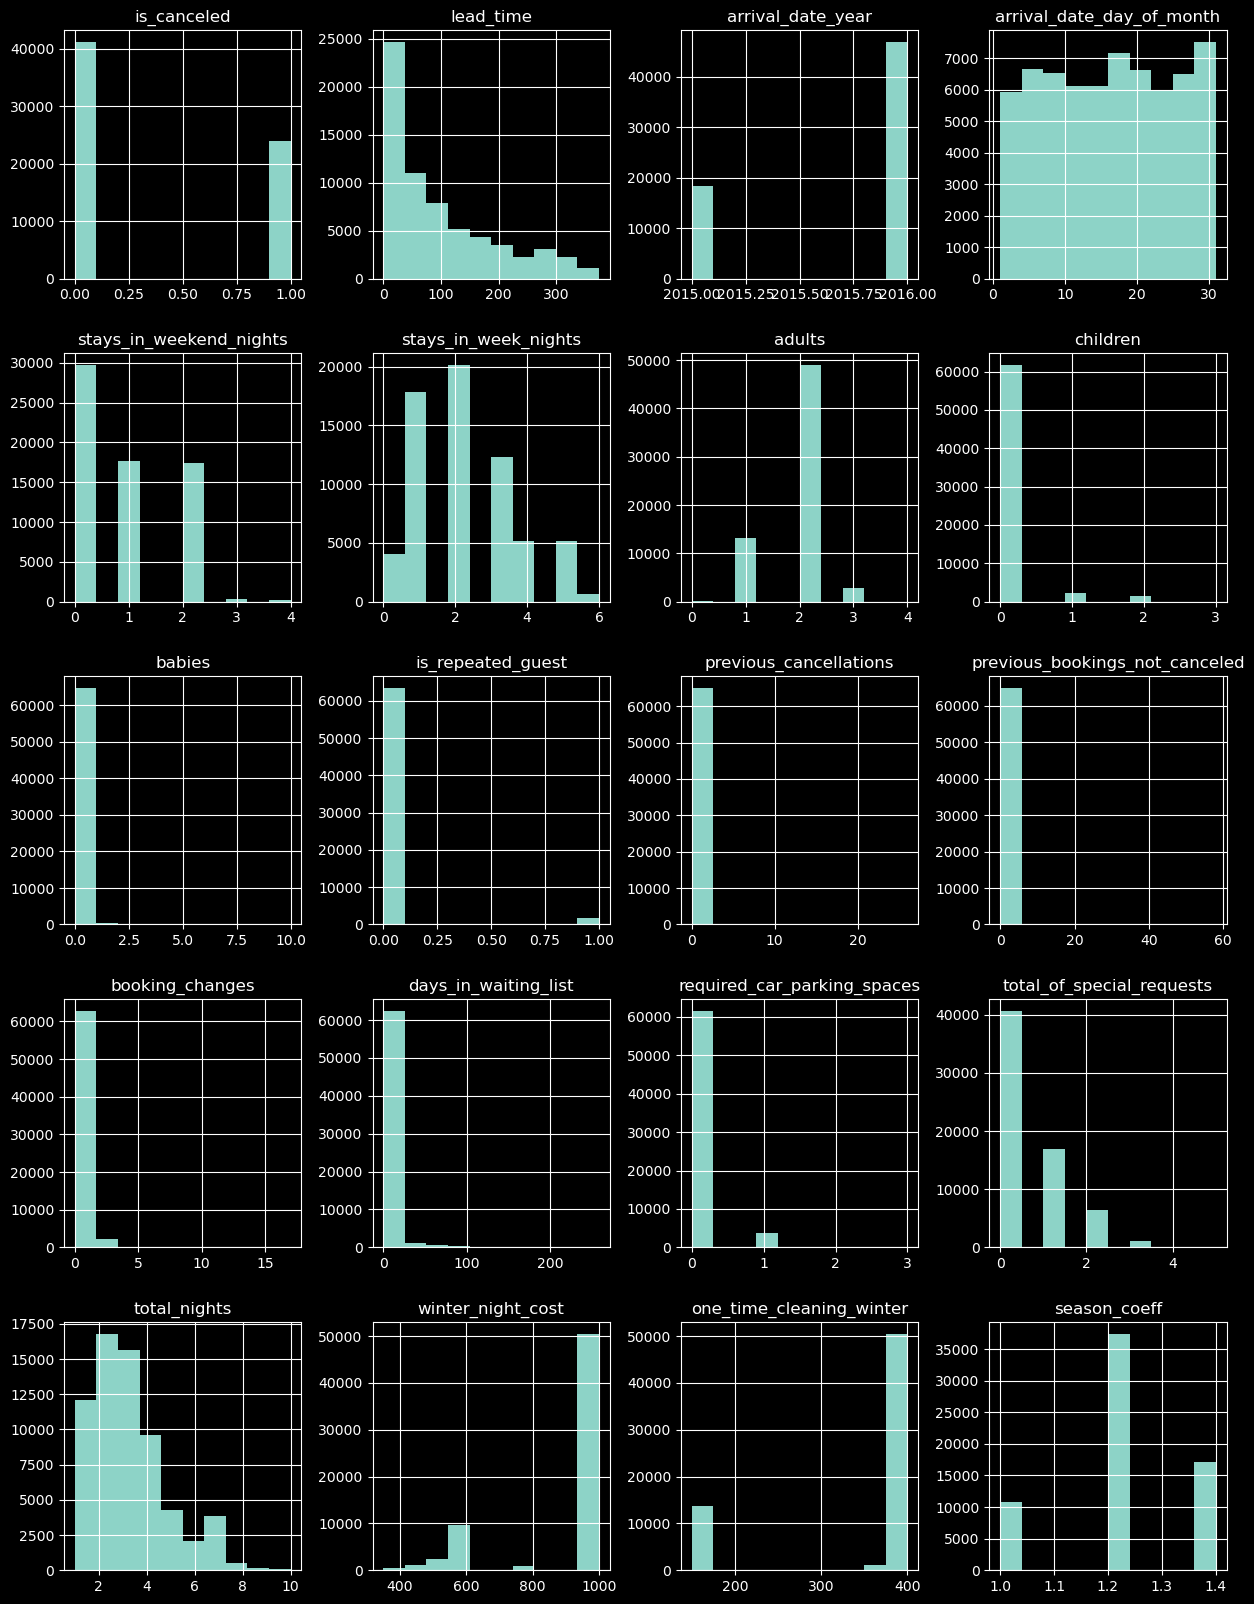

In [29]:
df_train.hist(figsize=(15, 20))
plt.show

We selectively check some parameters for outliers.

<AxesSubplot: >

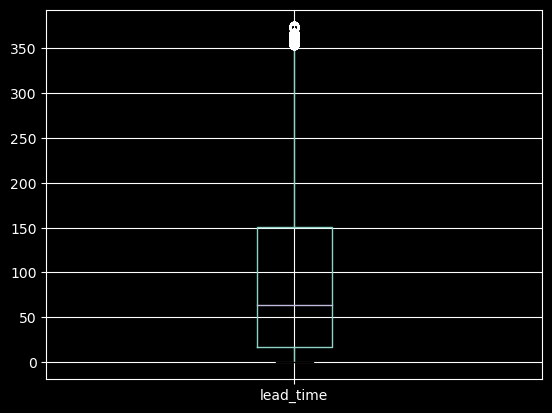

In [30]:
# The number of days between the reservation date and the arrival date
df_train.boxplot(column=['lead_time'])


<AxesSubplot: >

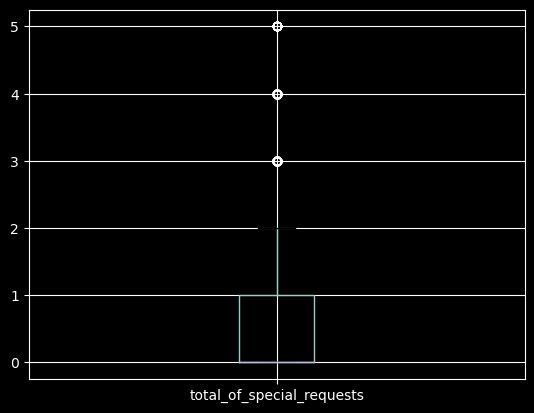

In [31]:
# number of special requests
df_train.boxplot(column=['total_of_special_requests'])

Selectively check the relationship of the target and some non-target parameters

Check-in month

Text(0, 0.5, 'Num. of Orders')

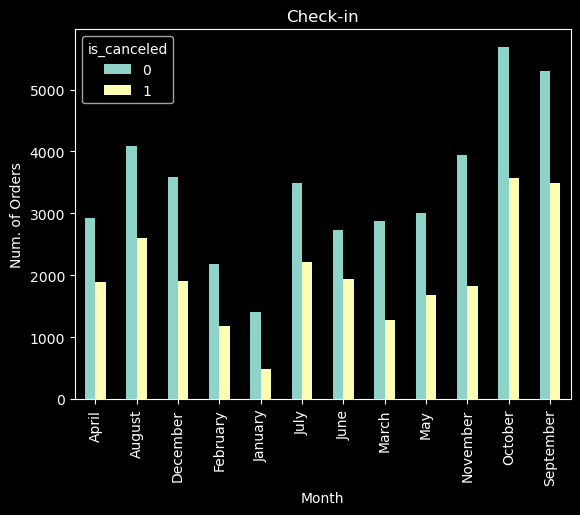

In [32]:
pd.crosstab(df_train['arrival_date_month'], df_train['is_canceled']).plot(kind = 'bar')
plt.title('Check-in')
plt.xlabel('Month')
plt.ylabel('Num. of Orders')

Check-in day

Text(0, 0.5, 'Num. of Orders')

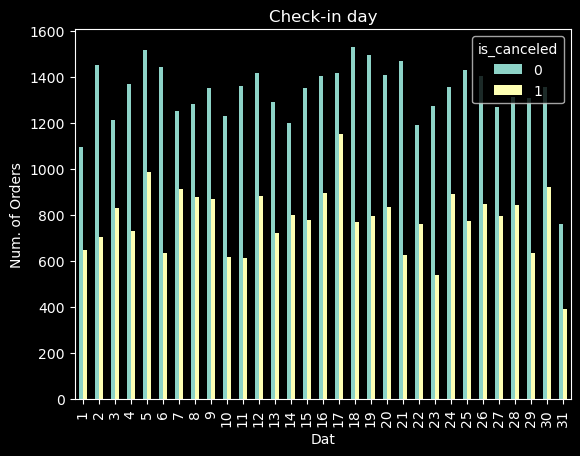

In [33]:
pd.crosstab(df_train['arrival_date_day_of_month'], df_train['is_canceled']).plot(kind = 'bar')
plt.title('Check-in day')
plt.xlabel('Dat')
plt.ylabel('Num. of Orders')

Orders by year

Text(0, 0.5, 'Num. of Orders')

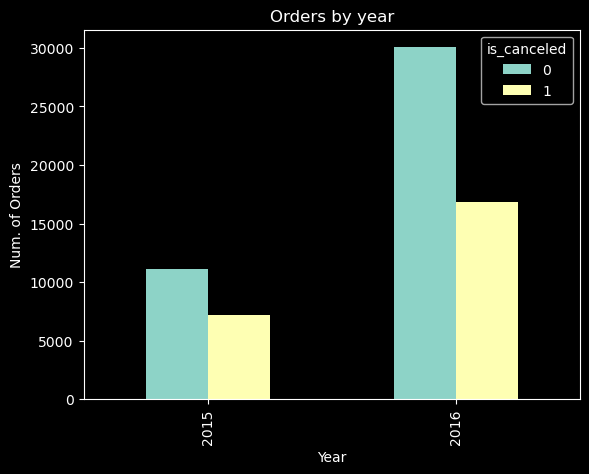

In [34]:
pd.crosstab(df_train['arrival_date_year'], df_train['is_canceled']).plot(kind = 'bar')
plt.title('Orders by year')
plt.xlabel('Year')
plt.ylabel('Num. of Orders')

Number of babies

Text(0, 0.5, 'Num. of Orders')

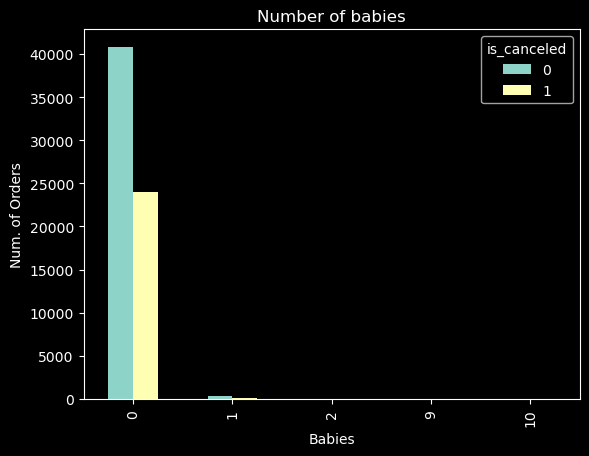

In [35]:
pd.crosstab(df_train['babies'], df_train['is_canceled']).plot(kind = 'bar')
plt.title('Number of babies')
plt.xlabel('Babies')
plt.ylabel('Num. of Orders')


Customer type

Text(0, 0.5, 'Num. of Orders')

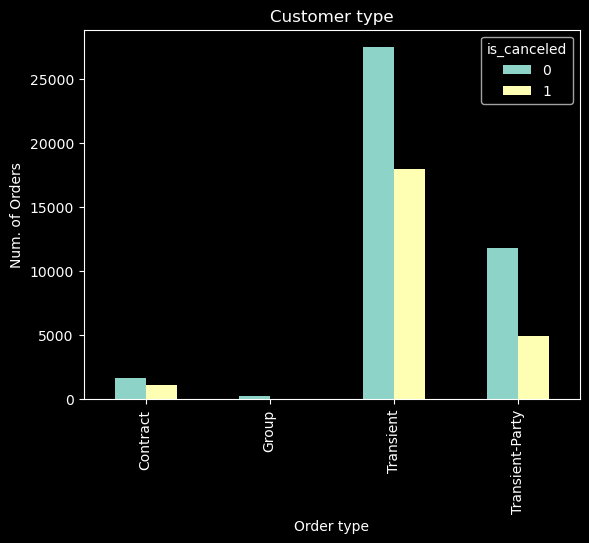

In [36]:
pd.crosstab(df_train['customer_type'], df_train['is_canceled']).plot(kind = 'bar')
plt.title('Customer type')
plt.xlabel('Order type')
plt.ylabel('Num. of Orders')

In [37]:
pd.crosstab(df_train['customer_type'], df_train['is_canceled'])

is_canceled,0,1
customer_type,,
Contract,1656,1090
Group,263,24
Transient,27476,18017
Transient-Party,11790,4913


Distribution channel

Text(0, 0.5, 'Num of orders')

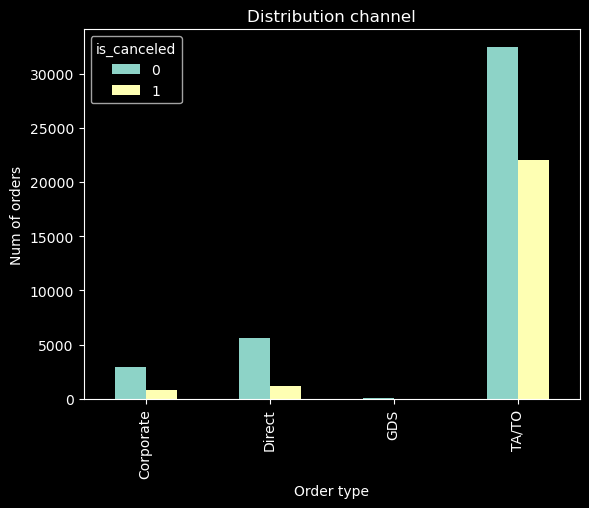

In [38]:
pd.crosstab(df_train['distribution_channel'], df_train['is_canceled']).plot(kind = 'bar')
plt.title('Distribution channel')
plt.xlabel('Order type')
plt.ylabel('Num of orders')

In [39]:
pd.crosstab(df_train['distribution_channel'], df_train['is_canceled'])

is_canceled,0,1
distribution_channel,,
Corporate,2992,831
Direct,5665,1188
GDS,80,19
TA/TO,32448,22006


`Conclusion:` The highest proportion of cancellations was made through the `TA/TO' channel

Order options

Text(0, 0.5, 'Num of orders')

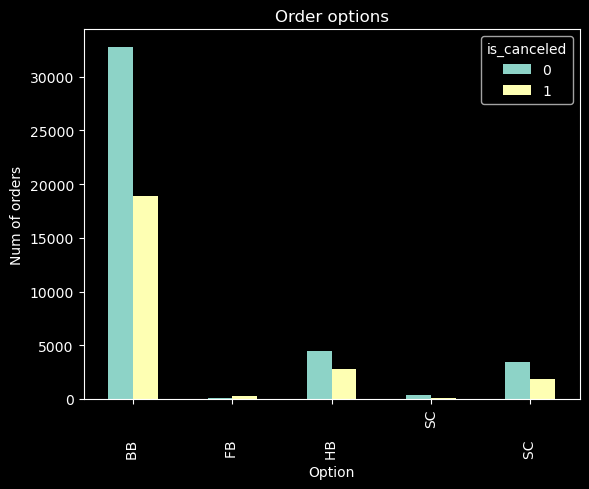

In [40]:
pd.crosstab(df_train['meal'], df_train['is_canceled']).plot(kind = 'bar')
plt.title('Order options')
plt.xlabel('Option')
plt.ylabel('Num of orders')

Reserved room type

Text(0, 0.5, 'Num of orders')

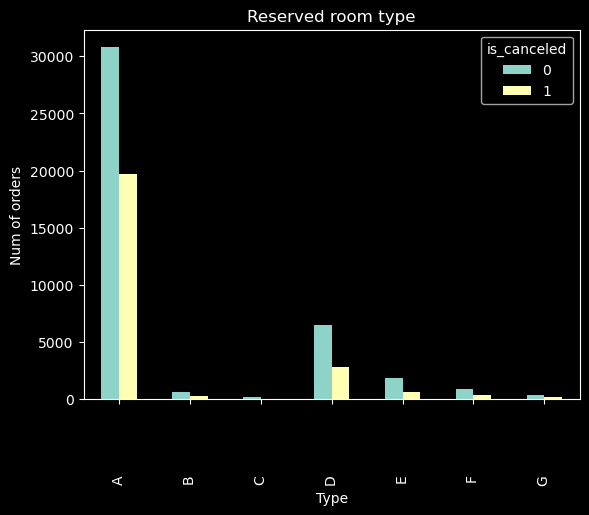

In [41]:
pd.crosstab(df_train['reserved_room_type'], df_train['is_canceled']).plot(kind = 'bar')
plt.title('Reserved room type')
plt.xlabel('Type')
plt.ylabel('Num of orders')

Booking changes

Text(0, 0.5, 'Num of orders')

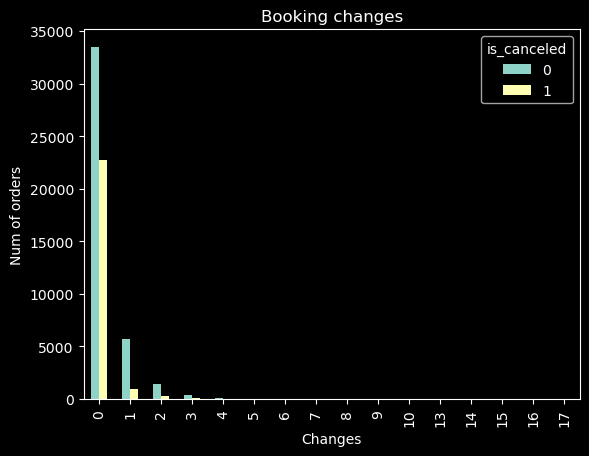

In [42]:
pd.crosstab(df_train['booking_changes'], df_train['is_canceled']).plot(kind = 'bar')
plt.title('Booking changes')
plt.xlabel('Changes')
plt.ylabel('Num of orders')

Number of children (from 3 to 14 y.o.)

Text(0, 0.5, 'Num of orders')

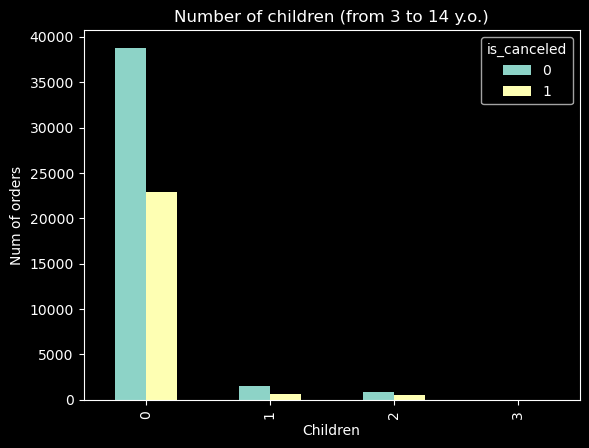

In [43]:
pd.crosstab(df_train['children'], df_train['is_canceled']).plot(kind = 'bar')
plt.title('Number of children (from 3 to 14 y.o.)')
plt.xlabel('Children')
plt.ylabel('Num of orders')

Customer type

Text(0, 0.5, 'Num of orders')

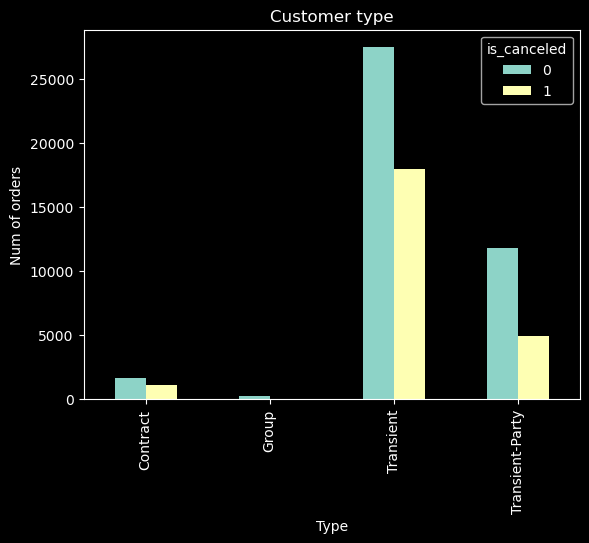

In [44]:
pd.crosstab(df_train['customer_type'], df_train['is_canceled']).plot(kind = 'bar')
plt.title('Customer type')
plt.xlabel('Type')
plt.ylabel('Num of orders')

Previous cancellations

Text(0, 0.5, 'Num of orders')

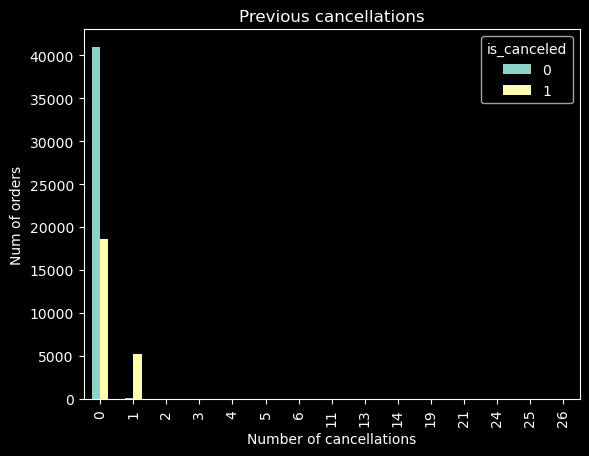

In [45]:
pd.crosstab(df_train['previous_cancellations'], df_train['is_canceled']).plot(kind = 'bar')
plt.title('Previous cancellations')
plt.xlabel('Number of cancellations')
plt.ylabel('Num of orders')

In [46]:
pd.crosstab(df_train['previous_cancellations'], df_train['is_canceled'])

is_canceled,0,1
previous_cancellations,,
0,40943,18648
1,135,5232
2,31,23
3,35,16
4,4,1
5,11,2
6,0,7
11,25,10
13,1,11


`Conclusion:` Those who canceled an order at least once have an increased probability of canceling a new order. The same can be said about those who have cancelled orders > 13 times.

Total of special requests

Text(0, 0.5, 'Num of orders')

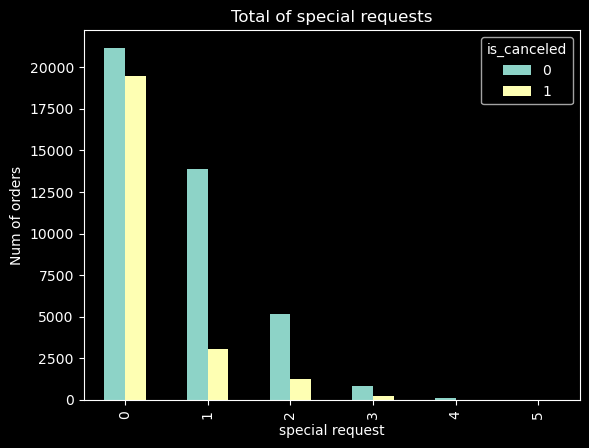

In [47]:
pd.crosstab(df_train['total_of_special_requests'], df_train['is_canceled']).plot(kind = 'bar')
plt.title('Total of special requests')
plt.xlabel('special request')
plt.ylabel('Num of orders')

In [48]:
pd.crosstab(df_train['total_of_special_requests'], df_train['is_canceled'])

is_canceled,0,1
total_of_special_requests,,
0,21170,19501
1,13884,3074
2,5191,1253
3,833,203
4,94,13
5,13,0


`Conclusion:` Stayers marked with the special tag `0` have a higher chance of cancelling a reservation

Analyze the balance of classes in the target variable

Text(0, 0.5, 'Num of classes')

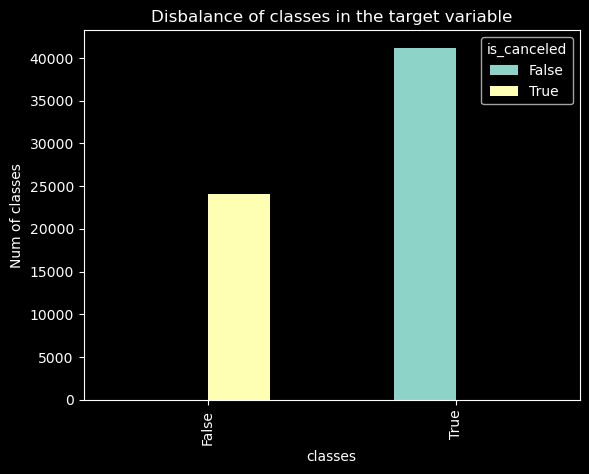

In [49]:
pd.crosstab(df_train['is_canceled'] == 0, df_train['is_canceled'] == 1).plot(kind = 'bar')
plt.title('Disbalance of classes in the target variable')
plt.xlabel('classes')
plt.ylabel('Num of classes')

In [50]:
print('is_canceled = 0: ',df_train.loc[df_train['is_canceled'] == 0, 'is_canceled'].count())
print('is_canceled = 1: ',df_train.loc[df_train['is_canceled'] == 1, 'is_canceled'].count())

is_canceled = 0:  41185
is_canceled = 1:  24044


`Conclusion:` The number of cancelled reservations is 58% of the number of non-cancelled reservations.

`EDA output:` There are outliers in the number of days between the booking date and the arrival date, which is not suspicious, but some customers may have booked well in advance. There are also outliers in the 'number of special marks' parameter, just to note this fact.

Note that the highest proportion of cancellations through the `TA/TO` channel

Those who have `cancelled an order` at least `once` have a higher probability of cancelling a new order. The same can be said about those who have cancelled >13 times.

Guests marked with the special tag `0` have a higher chance of canceling an order

### 1.1.4. <a id='toc1_1_4_'></a>[Step 3: Formulating an ML problem based on a business problem](#toc0_)

Create a function to calculate profits

In [51]:
def profit(row):
    if row['is_canceled'] == 0:
        income = row['winter_night_cost'] * row['season_coeff'] * row['total_nights']
        expences = row['one_time_cleaning_winter'] * round(row['total_nights'] / 2)
    else:
        income = 0
        expences = row['winter_night_cost'] * row['season_coeff'] + row['one_time_cleaning_winter']
    earned = income - expences
    return earned


Create a new attribute with the function

In [52]:
df_test['profit'] = df_test.apply(profit, axis=1)

Checking the creation of a new feature with profit / loss

In [53]:
# selectively display two columns

display(df_test.loc[:, ['winter_night_cost', 'profit']])

,winter_night_cost,profit
0,1000,-1400.0
1,1000,-1400.0
2,600,-950.0
3,600,-950.0
4,1000,-1400.0
...,...,...
32407,1000,7200.0
32408,1000,8200.0
32409,1000,8200.0
32410,1000,8200.0


We derived the profitability of each object in the test dateframe without taking into account the deposit to get the total profit: sum the readings of the `profit` parameter

In [54]:
# total profit of the booked rooms of the test sample
print('Total profit of the booked rooms of the test sample:', df_test.loc[(df_test['is_canceled'] == 0)]['profit'].sum())
print()

# total profit of the cancelled booked rooms of the test sample
print('Total loss of cancelled booked rooms of test sample:', df_test.loc[(df_test['is_canceled'] == 1)]['profit'].sum())
print()

# total profit of the test sample for 8 months (January-August)
print('total cumulative profit of the test sample (for 8 months):', df_test['profit'].sum())
print()

# total profit of the test sample per year
print('total sum of test sample profit (for a year):', df_test['profit'].sum() * 12/8)

# store in a variable
profit_before_ml = df_test['profit'].sum() * 12/8

Total profit of the booked rooms of the test sample: 58234560.0

Total loss of cancelled booked rooms of test sample: -17112820.0

total cumulative profit of the test sample (for 8 months): 41121740.0

total sum of test sample profit (for a year): 61682610.0


`Conclusion:` 29% of the proceeds are losses due to cancellation costs (room cleaning + cost per night)

### 1.1.5. <a id='toc1_1_5_'></a>[Step 4: Developing the ML model](#toc0_)

Do conversion of categorical features to numerical features for model training. Direct coding.

In [55]:
display(df_train.head())
df_train.shape

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,winter_night_cost,one_time_cleaning_winter,season_coeff
0,0,7,2015,July,1,0,1,1,0,0,BB,Direct,0,0,0,A,0,0,Transient,0,0,1,1000,400,1.4
1,0,14,2015,July,1,0,2,2,0,0,BB,TA/TO,0,0,0,A,0,0,Transient,0,1,2,1000,400,1.4
2,0,0,2015,July,1,0,2,2,0,0,BB,Direct,0,0,0,C,0,0,Transient,0,0,2,600,350,1.4
3,0,9,2015,July,1,0,2,2,0,0,FB,Direct,0,0,0,C,0,0,Transient,0,1,2,600,350,1.4
4,1,85,2015,July,1,0,3,2,0,0,BB,TA/TO,0,0,0,A,0,0,Transient,0,1,3,1000,400,1.4


(65229, 25)

In [56]:
# conversion df_train
df_train_ohe = pd.get_dummies(df_train, drop_first=True)

In [57]:
display(df_train_ohe.head())
df_train_ohe.shape

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights,winter_night_cost,one_time_cleaning_winter,season_coeff,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_FB,meal_HB,meal_SC,meal_SC,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,7,2015,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1000,400,1.4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,14,2015,1,0,2,2,0,0,0,0,0,0,0,0,1,2,1000,400,1.4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,0,2015,1,0,2,2,0,0,0,0,0,0,0,0,0,2,600,350,1.4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
3,0,9,2015,1,0,2,2,0,0,0,0,0,0,0,0,1,2,600,350,1.4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,1,85,2015,1,0,3,2,0,0,0,0,0,0,0,0,1,3,1000,400,1.4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


(65229, 47)

In [58]:
display(df_test.head())
df_test.shape

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,winter_night_cost,one_time_cleaning_winter,season_coeff,profit
0,1,74,2017,January,1,1,0,2,0,0,BB,TA/TO,0,0,0,A,0,0,Transient,0,0,1,1000,400,1.0,-1400.0
1,1,62,2017,January,1,2,2,2,0,0,BB,TA/TO,0,0,0,A,0,0,Transient,0,1,4,1000,400,1.0,-1400.0
2,1,62,2017,January,1,2,2,2,0,0,BB,TA/TO,0,0,0,A,0,0,Transient,0,1,4,600,350,1.0,-950.0
3,1,71,2017,January,1,2,2,1,0,0,BB,TA/TO,0,0,0,A,0,0,Transient,0,1,4,600,350,1.0,-950.0
4,1,172,2017,January,1,2,5,2,0,0,BB,TA/TO,0,0,0,A,0,0,Transient,0,0,7,1000,400,1.0,-1400.0


(32412, 26)

In [59]:
df_test_ohe = pd.get_dummies(df_test, drop_first=True)

In [60]:
display(df_test_ohe.head())
df_test_ohe.shape

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights,winter_night_cost,one_time_cleaning_winter,season_coeff,profit,arrival_date_month_August,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,meal_FB,meal_HB,meal_SC,meal_SC,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,1,74,2017,1,1,0,2,0,0,0,0,0,0,0,0,0,1,1000,400,1.0,-1400.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,62,2017,1,2,2,2,0,0,0,0,0,0,0,0,1,4,1000,400,1.0,-1400.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,62,2017,1,2,2,2,0,0,0,0,0,0,0,0,1,4,600,350,1.0,-950.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,1,71,2017,1,2,2,1,0,0,0,0,0,0,0,0,1,4,600,350,1.0,-950.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,172,2017,1,2,5,2,0,0,0,0,0,0,0,0,0,7,1000,400,1.0,-1400.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


(32412, 44)

Check the difference in parameters between datasets after encoding

In [61]:
# we see that five parameters are missing in both datasets at the same time

df_test_ohe.columns ^ df_train_ohe.columns

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5008\4155410789.py:3: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead.
  df_test_ohe.columns ^ df_train_ohe.columns


Index(['arrival_date_month_December', 'arrival_date_month_November',
       'arrival_date_month_October', 'arrival_date_month_September', 'profit'],
      dtype='object')

Add the missing parameters to the encoded datasets:

four parameters are added to `df_test_ohe`
one parameter in `df_train_ohe`

In [62]:
# df_test_ohe
df_test_ohe.insert(22, 'arrival_date_month_December', 0)
df_test_ohe.insert(29, 'arrival_date_month_November', 0)
df_test_ohe.insert(30, 'arrival_date_month_October', 0)
df_test_ohe.insert(31, 'arrival_date_month_September', 0)

# df_train_ohe
df_train_ohe.insert(20, 'profit', 0)

In [63]:
display(df_test_ohe.head())
df_test_ohe.shape

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights,winter_night_cost,one_time_cleaning_winter,season_coeff,profit,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_FB,meal_HB,meal_SC,meal_SC,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,1,74,2017,1,1,0,2,0,0,0,0,0,0,0,0,0,1,1000,400,1.0,-1400.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,62,2017,1,2,2,2,0,0,0,0,0,0,0,0,1,4,1000,400,1.0,-1400.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,62,2017,1,2,2,2,0,0,0,0,0,0,0,0,1,4,600,350,1.0,-950.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,1,71,2017,1,2,2,1,0,0,0,0,0,0,0,0,1,4,600,350,1.0,-950.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,172,2017,1,2,5,2,0,0,0,0,0,0,0,0,0,7,1000,400,1.0,-1400.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


(32412, 48)

In [64]:
display(df_train_ohe.head())
df_train_ohe.shape

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights,winter_night_cost,one_time_cleaning_winter,season_coeff,profit,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_FB,meal_HB,meal_SC,meal_SC,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,7,2015,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1000,400,1.4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,14,2015,1,0,2,2,0,0,0,0,0,0,0,0,1,2,1000,400,1.4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,0,2015,1,0,2,2,0,0,0,0,0,0,0,0,0,2,600,350,1.4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
3,0,9,2015,1,0,2,2,0,0,0,0,0,0,0,0,1,2,600,350,1.4,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,1,85,2015,1,0,3,2,0,0,0,0,0,0,0,0,1,3,1000,400,1.4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


(65229, 48)

Check that there are no columns present in only one dataframe

In [65]:
df_test_ohe.columns ^ df_train_ohe.columns

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5008\652679777.py:1: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead.
  df_test_ohe.columns ^ df_train_ohe.columns


Index([], dtype='object')

The parameters in both dataframes are the same. Proceed to split into target and non-target samples for the training `df_train` and the test dataframe `df_test`.

We divide the training and validation samples into target and non-target samples

In [66]:
# extract the features, exclude the target feature and the features that have no predictive power 
features_train = df_train_ohe.drop(['is_canceled'], axis=1) 
    
# extract the target feature
target_train = df_train_ohe['is_canceled'] 

# extract the features, exclude the target feature and the features that have no predictive power 
features_test = df_test_ohe.drop(['is_canceled'], axis=1)
    
# extract the target characteristic
target_test = df_test_ohe['is_canceled'] 

Output the shape of the resulting samples

In [67]:
print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)

(65229, 47)
(65229,)
(32412, 47)
(32412,)


Scaling

In [68]:
scaler = StandardScaler()
scaler.fit(features_train)

features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

pd.options.mode.chained_assignment = None


`Selecting a metric for models:` The most important metric for the problem is `Recall` since this metric determines the number of true positives among all class labels that have been defined as `positive`. This estimation metric is especially important when the error of not recognizing a positive class in a given problem is high. In our case, not recognizing a positive class would lead to an incorrect estimation of cancelled guests and, as a result, an incorrect prediction of cancellations. This will lead to unexpected losses.

Logistic Regression

In [69]:
# model initialization
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=2000)

# training the model
model.fit(features_train, target_train)

# model predictions
predictions_logistic = model.predict(features_train)

probabilities_valid = model.predict_proba(features_train)
probabilities_one_valid = probabilities_valid[:, 1]

# crossvalidation with five blocks
mean_score = cross_val_score(model, features_train, target_train, cv=5, scoring='recall').mean()

# the best recall metric
print('Best Recall              ', mean_score)

Best Recall               0.30983093264189543


Decision Tree

In [70]:
# create variables to identify the best model and the best result
best_model = None
best_mean_score = 0
best_criterion = 0


creteria_list = ['gini', 'entropy']
# create a loop to search for the hyperparameter
for crit in creteria_list:
	# create a loop to search the depth of the tree
	for depth in range(1, 20):
		# create a variable and write the tree depth enumeration model into it and add randomness to improve the result
		model = DecisionTreeClassifier(criterion=crit, random_state=12345, max_depth= depth)

		# train the model with the given tree depth
		model.fit(features_train, target_train)

		# calculate predictions of the model based on validation sample
		predictions_dt = model.predict(features_train)
		probabilities_valid = model.predict_proba(features_train)
		probabilities_one_valid = probabilities_valid[:, 1]
		
	
		mean_score = cross_val_score(model, features_train, target_train, cv=5, scoring='recall').mean()
		
		# find the best model
		if mean_score > best_mean_score:
			best_criterion = crit
			best_mean_score = mean_score
			best_model = model
			
		
		
# display the results        
print('Лучшая модель:                           ', best_model)
print('Лучший критерий:                         ', best_criterion)
print('Лучшая полнота:                          ', best_mean_score)

Лучшая модель:                            DecisionTreeClassifier(max_depth=4, random_state=12345)
Лучший критерий:                          gini
Лучшая полнота:                           0.636303974902853


Random Forest

In [71]:
# create variables to find the best model, the best result
# create counters for number of trees and tree depth to identify the combination with the best accuracy
best_model = None
n_est = 0
max_depth = 0
best_recall = 0
best_final_score = 0


# we create a loop with the search by the number of trees
for est in range(40, 50):
    # create a nested loop with the search of the depth of each tree
    for depth in range(1, 10):

        # create a variable and save a model to it with a brute-force search of the number of trees, 
        # and adding randomness to improve the result
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)

        # train the model on the training sample
        model.fit(features_train, target_train)

        # calculate predictions of the model based on the training set
        predictions = model.predict(features_train)

        
        # perform cross-validation
        scores = cross_val_score(model, features_train, target_train, cv=5, scoring='recall')
        final_score = scores.mean()

        probabilities_valid = model.predict_proba(features_train)
        probabilities_one_valid = probabilities_valid[:, 1]


        # find the best model, find the optimal number of trees and their depth
        if final_score > best_final_score:
            best_final_score = final_score
            n_est = est
            max_depth = depth
            best_model = model
        

#  the output results

print('Количество деревьев (est):                       ', n_est) 
print('Глубина дерева (depth):                          ', max_depth)
print('Лучшая полнота:                                  ', best_final_score)

Количество деревьев (est):                        47
Глубина дерева (depth):                           9
Лучшая полнота:                                   0.3952128375491184


`Conclusion:`

According to the results of model training, the best model with the highest recall metrics was `The decision tree`.

#### 1.1.5.1. <a id='toc1_1_5_1_'></a>[Applying the best model to the test sample](#toc0_)

Apply the decision tree for `df_test` sample with the best parameters: `DecisionTreeClassifier(max_depth=19, random_state=12345)` criterion='gini'

In [72]:
# create a variable and save to it the model with the best scores tested on the training sample.
model = DecisionTreeClassifier(criterion='gini', random_state=12345, max_depth= 4) 

# train the model with the given tree depth
model.fit(features_train, target_train)

# calculate model predictions on the basis of validation sample
predictions_dt_test = model.predict(features_test)

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

# find the quality of the model by comparing the results of the validation sample and the results of the predictive model
result = accuracy_score(target_test, predictions_dt_test)

# save metrics values into variables
f1 = f1_score(target_test, predictions_dt_test)
recall = recall_score(target_test, predictions_dt_test)
roc = roc_auc_score(target_test, probabilities_one_test)

		
# output results  
   
print('Лучшая (Accuracy):                         ', result)
print('Лучшая F1-мера:                            ', f1)
print('Лучшая полнота:                            ', recall)
print('Лучшая ROC_AUC:                            ', roc)
 


Лучшая (Accuracy):                          0.7234357645316549
Лучшая F1-мера:                             0.6163984936665525
Лучшая полнота:                             0.5719958700659201
Лучшая ROC_AUC:                             0.7378422634304449


Check the prediction type and change it to Series in order to add the predictions to the `df_test` table

In [73]:
# checking data type
print(type(predictions_dt_test))

# changing data type
predictions_dt_test_series = pd.Series(predictions_dt_test)

# checking the datatype change to Series
type(predictions_dt_test_series)


<class 'numpy.ndarray'>


pandas.core.series.Series

Add a new parameter `is_canceled_predicted` to `df_test` with model predictions.

In [74]:
df_test['is_canceled_predicted'] = predictions_dt_test_series

Output the table for viewing

In [75]:
df_test.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,winter_night_cost,one_time_cleaning_winter,season_coeff,profit,is_canceled_predicted
0,1,74,2017,January,1,1,0,2,0,0,BB,TA/TO,0,0,0,A,0,0,Transient,0,0,1,1000,400,1.0,-1400.0,1
1,1,62,2017,January,1,2,2,2,0,0,BB,TA/TO,0,0,0,A,0,0,Transient,0,1,4,1000,400,1.0,-1400.0,0
2,1,62,2017,January,1,2,2,2,0,0,BB,TA/TO,0,0,0,A,0,0,Transient,0,1,4,600,350,1.0,-950.0,0
3,1,71,2017,January,1,2,2,1,0,0,BB,TA/TO,0,0,0,A,0,0,Transient,0,1,4,600,350,1.0,-950.0,0
4,1,172,2017,January,1,2,5,2,0,0,BB,TA/TO,0,0,0,A,0,0,Transient,0,0,7,1000,400,1.0,-1400.0,1


Profit Calculation

In [76]:
def profit_predicted(row, col):
    if row['is_canceled'] == 0:
        income = row['winter_night_cost'] * row['season_coeff'] * row['total_nights']
        expences = row['one_time_cleaning_winter'] * round(1 + row['total_nights'] // 2)
    elif(row[col] == 0) and (row['is_canceled'] ==1 ):
        income = 0 # canceled, no profit
        expences = row['one_time_cleaning_winter'] + row['winter_night_cost'] * row['season_coeff']
        
    elif (row[col] == 1) and (row['is_canceled']==1):
        # option 3 if the system correctly predicts reservation cancellation, then the client is offered a deposit
        income= row['winter_night_cost'] * 0.8 * row['season_coeff'] + row['one_time_cleaning_winter'] * 0.8
        # and only one time cleaning is expensed
        expences = row['one_time_cleaning_winter'] + row['winter_night_cost'] * row['season_coeff']
    profit_total = income - expences
    return profit_total

In [77]:
df_test['profit_predicted'] = df_test.apply(profit_predicted, col='is_canceled_predicted', axis = 1)
profit_predicted2 = df_test['profit_predicted'].sum()

print('Total profit of the test sample (per year) before prediction:                        ',  profit_before_ml)
#print()
print('Total profit of the test sample after ML (for 8 months):                             ',  profit_predicted2)
#print()
print('Total profit of the test sample after ML (for one year):                             ',  profit_predicted2 * 12/8)
#print()
print('Total profit of the test sample (per year) after ML taking into account 400k budget: ',  profit_predicted2 * 12/8 - BUDGET)
#print()
print('Profit from implementation of the model (per year) taking into account 400k budget:  ',  (profit_predicted2 * 12/8 - profit_before_ml) - BUDGET)


Total profit of the test sample (per year) before prediction:                         61682610.0
Total profit of the test sample after ML (for 8 months):                              44049248.0
Total profit of the test sample after ML (for one year):                              66073872.0
Total profit of the test sample (per year) after ML taking into account 400k budget:  65673872.0
Profit from implementation of the model (per year) taking into account 400k budget:   3991262.0


`Conclusion:` As a result of applying the `decision tree` model we were able to get predictions of customer cancellations, which increased the predictive ability and led to an increase in hotel profits from 61682610.0 rubles to 65673872.0 rubles, taking into account the budget spent 400,000 to create the model.

As a result, taking into account the cost of creating the model, the hotel's profit increased by 3991262.0 rubles after applying the model.

### 1.1.6. <a id='toc1_1_6_'></a>[Step 5: Describe the profile of the "unreliable" client](#toc0_)

Create a list of attributes to determine their impact on the target attribute

In [78]:
df_test_ohe_col = df_test_ohe.columns
df_test_ohe_col = df_test_ohe_col.drop(['profit'])
df_test_ohe_col

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_nights', 'winter_night_cost',
       'one_time_cleaning_winter', 'season_coeff', 'arrival_date_month_August',
       'arrival_date_month_December', 'arrival_date_month_February',
       'arrival_date_month_January', 'arrival_date_month_July',
       'arrival_date_month_June', 'arrival_date_month_March',
       'arrival_date_month_May', 'arrival_date_month_November',
       'arrival_date_month_October', 'arrival_date_month_September',
       'meal_FB       ', 'meal_HB       ', 'meal_SC', 'meal_SC       ',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_ch

Calculate and visualize `feature importance` for the test dataset

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights,winter_night_cost,one_time_cleaning_winter,season_coeff,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_FB,meal_HB,meal_SC,meal_SC,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,1,74,2017,1,1,0,2,0,0,0,0,0,0,0,0,0,1,1000,400,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,62,2017,1,2,2,2,0,0,0,0,0,0,0,0,1,4,1000,400,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,62,2017,1,2,2,2,0,0,0,0,0,0,0,0,1,4,600,350,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,1,71,2017,1,2,2,1,0,0,0,0,0,0,0,0,1,4,600,350,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,172,2017,1,2,5,2,0,0,0,0,0,0,0,0,0,7,1000,400,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


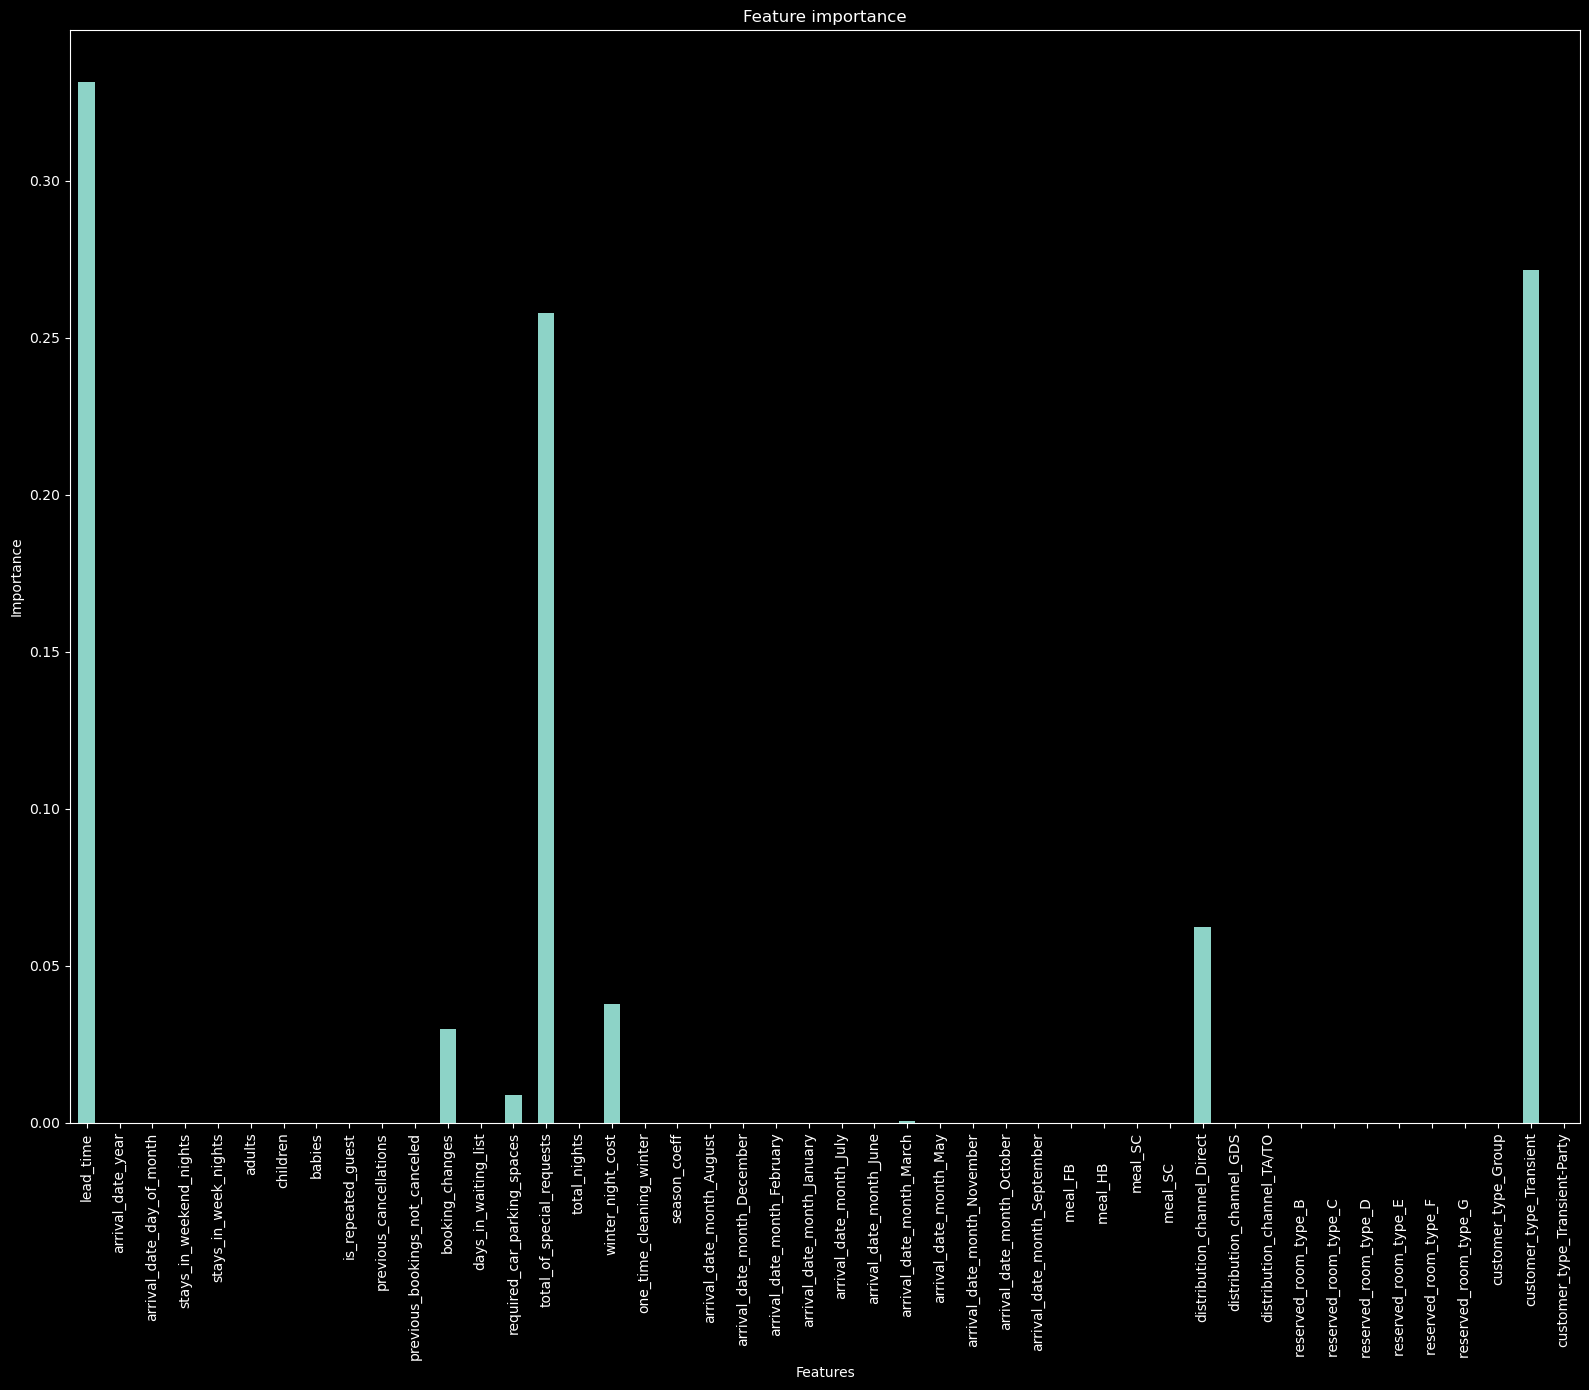

In [79]:
df_test_v = pd.DataFrame(data=df_test_ohe, columns=df_test_ohe_col)
df_test_v['is_canceled'] = df_test_ohe['is_canceled']
display(df_test_v.head())

model = DecisionTreeClassifier(random_state=12345, max_depth = 4)
model.fit(X = df_test_v.drop(['is_canceled'], axis=1),
y = df_test_v['is_canceled'])

df_test_imp = pd.Series(model.feature_importances_, df_test_v.drop(['is_canceled'], axis=1).columns)
fig, ax = plt.subplots(figsize=(16,14))

df_test_imp.plot.bar(ax=ax)
ax.set_title("Feature importance")
ax.set_xlabel('Features')
ax.set_ylabel('Importance')
fig.tight_layout()

`Conclusion:` The greatest influence, in descending order, was exerted by the parameters: 

*lead_time* 

*customer_type_Transient* 

*total_of_special_requests* 

Let's see exactly how these values affect booking rejection.

**Checking `lead_time`**

In [80]:
# create a list instead of an array
lead_time_list = df_test_ohe['lead_time'].unique()
lead_time_list = pd.Series(lead_time_list)

We loop through all values of `lead_time` to see at which values it is observed the largest number of cancellations

In [81]:
most_cancellations = 0
best_lt = 0

for i in lead_time_list:
    cancellations = df_test_ohe.loc[(df_test_ohe['lead_time'] == i) & (df_test_ohe['is_canceled'] == 1), 'is_canceled'].count()
    
    if cancellations > most_cancellations:
        most_cancellations = cancellations
        best_lt = i
print('Most cancellations:                  ', most_cancellations)
print('Observed for "Lead time in days":    ', best_lt)

Most cancellations:                   177
Observed for "Lead time in days":     56


Create a graph

Text(0, 0.5, 'Cancellation status (1 - cancelled, 0 - not cancelled)')

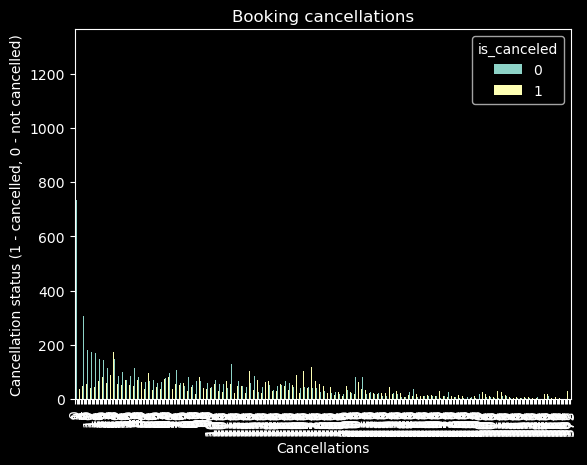

In [82]:
pd.crosstab(df_test_ohe['lead_time'], df_test_ohe['is_canceled']).plot(kind = 'bar')
plt.title('Booking cancellations')
plt.xlabel('Cancellations')
plt.ylabel('Cancellation status (1 - cancelled, 0 - not cancelled)')

`Conclusion:` Most cancellations are observed for the 56-day mark between the reservation date and the arrival date

**Checking `total_of_special_requests`**

In [83]:
# unique values
df_test_ohe['total_of_special_requests'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [84]:
# find the number of cancellations for  ['total_of_special_requests'] == 0
df_test_ohe.loc[(df_test_ohe['total_of_special_requests'] == 0) & (df_test_ohe['is_canceled'] == 1), 'is_canceled'].count()

8575

Create a graph

Text(0, 0.5, 'Cancellation status (1 - cancelled, 0 - not cancelled)')

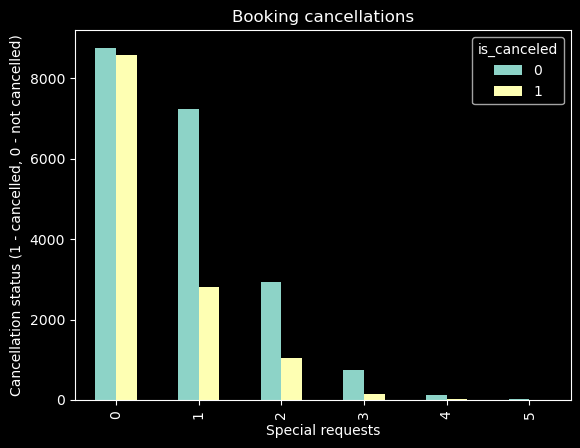

In [85]:
pd.crosstab(df_test_ohe['total_of_special_requests'], df_test_ohe['is_canceled']).plot(kind = 'bar')
plt.title('Booking cancellations')
plt.xlabel('Special requests')
plt.ylabel('Cancellation status (1 - cancelled, 0 - not cancelled)')

`Conclusion:` Most of the cancellations are observed for the special note - 0.

**Checking `customer_type_Transient`**

In [86]:
# unique values
df_test_ohe['customer_type_Transient'].unique()

array([1, 0], dtype=uint8)

In [87]:
# we find the number of cancellations for the value ['customer_type_Transient'] == 1
df_test_ohe.loc[(df_test_ohe['customer_type_Transient'] == 1) & (df_test_ohe['is_canceled'] == 1), 'is_canceled'].count()

11805

Create a graph

Text(0, 0.5, 'Cancellation status (1 - cancelled, 0 - not cancelled)')

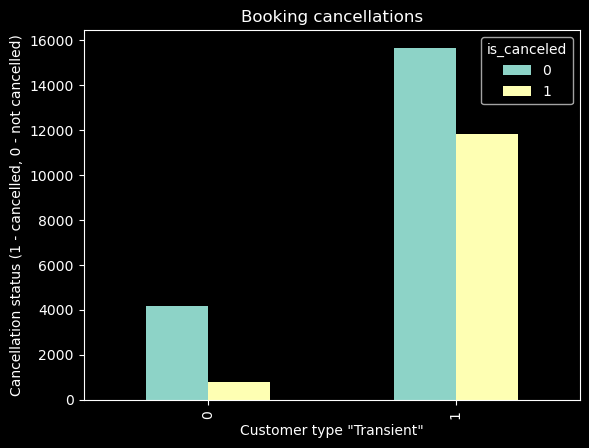

In [88]:
pd.crosstab(df_test_ohe['customer_type_Transient'], df_test_ohe['is_canceled']).plot(kind = 'bar')
plt.title('Booking cancellations')
plt.xlabel('Customer type "Transient"')
plt.ylabel('Cancellation status (1 - cancelled, 0 - not cancelled)')

`Conclusion:` Most cancellations are observed for the type of customer - "Transient"

`General conclusion, a portrait of an unreliable customer:`

According to the results of model predictions, the greatest influence, with a large margin, on the target attribute (booking rejection) had `lead_time` - the number of days between the date of booking and the date. 

In second place is `customer_type_Transient` - type of customer. and with a small digression `total_of_special_requests` - number of special marks.

The portrait of the unreliable client prone to cancellation:

- A client with 56 days between the reservation date and the arrival date 
- Clients with a special mark - 0.
- Customers of the type of customer - "Transient"

### 1.1.7. <a id='toc1_1_7_'></a>[Step 6. Write a general conclusion](#toc0_)

**Summary:**

As a result of the research, the best model for predicting booking cancellation was the Decision Tree model as it showed the best recall metric which is the key metric in this problem.

The most important metric for the problem is `Recall` as this metric determines the number of true positives among all class labels that have been defined as `positive'. This estimation metric is especially important when the error of not recognizing a positive class in a given problem is high. In our case, not recognizing a positive class would lead to an incorrect estimation of cancelled guests and, as a result, an incorrect prediction of cancellations. This will result in unanticipated losses.

In our case study, the model that showed the greatest efficiency and accuracy was:

`DecisionTreeClassifier(max_depth=19, random_state=12345)`.


**Recommendations:**

When selecting potential guests from whom to take a deposit, I think it advisable to pay attention to the following categories of guests:


According to the results of model predictions, the greatest influence, with a large margin, on the target attribute (booking rejection) had `lead_time` - the number of days between the date of booking and the date. 

In second place is the day of the month - `customer_type_Transient` - type of customer and with a small breakaway `total_of_special_requests` - number of special marks.

You should avoid customers close to the portrait of an unreliable customer, which is the following set of characteristics:


- Clients with 56 days between the reservation date and the arrival date 
- Clients with a special mark - 0.
- Clients of the type of customer - "not related to the contract or group check-in".